In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/financial-transaction-matching-icaif-2023/icaif_fintran_sampleSubmissionKaggle.csv
/kaggle/input/financial-transaction-matching-icaif-2023/icaif_fintran_train.csv
/kaggle/input/financial-transaction-matching-icaif-2023/icaif_fintran_eval.csv
/kaggle/input/financial-transaction-matching-icaif-2023/icaif_fintran_sampleSubmissionFull.csv


In [2]:
eval_data = pd.read_csv("/kaggle/input/financial-transaction-matching-icaif-2023/icaif_fintran_eval.csv")
df = pd.read_csv("/kaggle/input/financial-transaction-matching-icaif-2023/icaif_fintran_train.csv")
sample_sub = pd.read_csv("/kaggle/input/financial-transaction-matching-icaif-2023/icaif_fintran_sampleSubmissionFull.csv")

In [3]:
df.head()

,matchId,matchDate,matchRule,matchedBy,wasPreviouslyMismatched,A_transactionType,A_id,A_allocation,A_importDate,A_debitOrCredit,...,B_id,B_importDate,B_debitOrCredit,B_amount,B_valueDate,B_currencyCode,B_account,B_transactionReferences,B_transactionAttributes,targetAllocation
0,504385986027,2015-03-12,RULE 4,FAECAL IPL,0,NaN,NaN,NaN,NaN,NaN,...,2.800080e+11,2015-03-09,DR,6.507685e+09,2015-03-08,USD,ACC#00001,JOQGE 5280766176VI,NaN,USD_2015-03-08_ACC#00001_66412 66510665106...
1,504385986027,2015-03-12,NaN,FAECAL IPL,0,NaN,NaN,NaN,NaN,NaN,...,9.830071e+11,2015-03-12,DR,4.000000e+03,2015-03-08,USD,ACC#00001,JOQGE 5280766176VI,NaN,USD_2015-03-08_ACC#00001_66412 66510665106...
2,504385986027,2015-03-12,RULE 4,FAECAL IPL,0,A,8.061604e+11,USD_2015-03-08_ACC#00001_66412 66510665106...,2015-03-12,CR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,363434063263,2015-03-13,RULE 4,FAECAL,0,NaN,NaN,NaN,NaN,NaN,...,4.657845e+11,2015-03-13,CR,-4.000000e+03,2015-03-08,USD,ACC#00001,VOLERY L-7186666178VI,OB CROM WOE SLUM MURREY NA 09201-7,NaN
4,870402401618,2015-03-25,RULE 4,FAECAL IPL,0,A,9.271706e+11,USD_2015-03-20_ACC#00001_66412 66073660736...,2015-03-22,DR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [4]:
df.shape

(164262, 27)

In [5]:
name_of_columns = df.columns.tolist()
print(name_of_columns)

['matchId', 'matchDate', 'matchRule', 'matchedBy', 'wasPreviouslyMismatched', 'A_transactionType', 'A_id', 'A_allocation', 'A_importDate', 'A_debitOrCredit', 'A_amount', 'A_valueDate', 'A_currencyCode', 'A_account', 'A_transactionReferences', 'A_transactionAttributes', 'B_transactionType', 'B_id', 'B_importDate', 'B_debitOrCredit', 'B_amount', 'B_valueDate', 'B_currencyCode', 'B_account', 'B_transactionReferences', 'B_transactionAttributes', 'targetAllocation']


In [6]:
columns_A = ['A_transactionType', 'A_id', 'A_allocation', 'A_debitOrCredit', 'A_amount', 'A_valueDate', 'A_currencyCode','A_transactionReferences', 'A_transactionAttributes']
columns_B = ['B_transactionType', 'B_id', 'B_debitOrCredit', 'B_amount', 'B_valueDate', 'B_currencyCode','B_transactionReferences', 'B_transactionAttributes', 'targetAllocation']

In [7]:
df_A = df[columns_A]
df_A.head()
df_A = df_A.dropna()

In [8]:
column_to_check = 'A_allocation'

# Check if the specified column has any null values
if df_A[column_to_check].isnull().any():
    # Print the number of null values in the specified column
    print(f"The column '{column_to_check}' has {df_A[column_to_check].isnull().sum()} null values.")
else:
    print(f"The column '{column_to_check}' does not have any null values.")

The column 'A_allocation' does not have any null values.


In [9]:
df_B = df[columns_B]
df_B = df_B.dropna()

In [10]:
column_to_check = 'targetAllocation'

# Check if the specified column has any null values
if df_B[column_to_check].isnull().any():
    # Print the number of null values in the specified column
    print(f"The column '{column_to_check}' has {df_B[column_to_check].isnull().sum()} null values.")
else:
    print(f"The column '{column_to_check}' does not have any null values.")

The column 'targetAllocation' does not have any null values.


In [11]:
df_B.head()

,B_transactionType,B_id,B_debitOrCredit,B_amount,B_valueDate,B_currencyCode,B_transactionReferences,B_transactionAttributes,targetAllocation
5,B,3.247800e+11,CR,-4400.00,2015-03-21,USD,6000796676523097 4788366111FW,Y.M. TONITE (GOLACH) NM LAMPAD 00,[USD_2015-03-20_ACC#00001_66412 6607366073...
9,B,1.810570e+11,CR,-45000.00,2021-10-20,USD,VOLERY 1515326666FP,TUP C818366666666666IFV /IFV CLASP,USD_2021-10-20_ACC#00001_66912 02507025077...
10,B,5.482324e+11,CR,-158948.00,2021-10-20,USD,VOLERY 1515326666FP,TUP C818366666666666IFV /IFV CLASP,USD_2021-10-20_ACC#00001_66912 02507025077...
11,B,9.593513e+11,CR,-70.90,2021-12-16,USD,V394464567735831 6459066719VI,UPCLOSER SAUNT TYPY AFTONIAN ARAWA,USD_2021-12-16_ACC#00001_66912 0256602566 ...
12,B,8.104622e+11,CR,-469773.22,2021-12-16,USD,V394464567735831 6459066719VI,UPCLOSER SAUNT TYPY AFTONIAN ARAWA,USD_2021-12-16_ACC#00001_66912 0256602566 ...


In [12]:
print(df_A.shape)
print(df_B.shape)

(88495, 9)
(61354, 9)


In [13]:
sample_sub.head()

,B_id,targetAllocation,confidence,explanation
0,749569363550,USD_2023-03-05_ACC#00001_66912 01477014778...,1.00,A_Amount = B_Amount and A_valueDate = B_valueDate
1,140912616757,[USD_2023-05-31_ACC#00001_66912 0670806708...,0.95,A_Amount = B_Amount and A_transactionAttribute...
2,666443912041,NaN,0.99,No suitable candidate matches
3,944631409211,NaN,0.99,No suitable candidate matches
4,242654454150,NaN,0.99,No suitable candidate matches


In [14]:
# Lets look at the individual row 2 to see what makes a good match
sample_sub.loc[1, 'explanation']

'A_Amount = B_Amount and A_transactionAttributes to B_transactionAttributes'

In [15]:
# Lets creat a feature where it tells if there's a match then its 1 and if there's no match then its a 0 in our training data we will always have a match
df['match'] = (df['targetAllocation'].notnull()) | (df['A_allocation'].notnull())

In [16]:
df.head()

,matchId,matchDate,matchRule,matchedBy,wasPreviouslyMismatched,A_transactionType,A_id,A_allocation,A_importDate,A_debitOrCredit,...,B_importDate,B_debitOrCredit,B_amount,B_valueDate,B_currencyCode,B_account,B_transactionReferences,B_transactionAttributes,targetAllocation,match
0,504385986027,2015-03-12,RULE 4,FAECAL IPL,0,NaN,NaN,NaN,NaN,NaN,...,2015-03-09,DR,6.507685e+09,2015-03-08,USD,ACC#00001,JOQGE 5280766176VI,NaN,USD_2015-03-08_ACC#00001_66412 66510665106...,True
1,504385986027,2015-03-12,NaN,FAECAL IPL,0,NaN,NaN,NaN,NaN,NaN,...,2015-03-12,DR,4.000000e+03,2015-03-08,USD,ACC#00001,JOQGE 5280766176VI,NaN,USD_2015-03-08_ACC#00001_66412 66510665106...,True
2,504385986027,2015-03-12,RULE 4,FAECAL IPL,0,A,8.061604e+11,USD_2015-03-08_ACC#00001_66412 66510665106...,2015-03-12,CR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True
3,363434063263,2015-03-13,RULE 4,FAECAL,0,NaN,NaN,NaN,NaN,NaN,...,2015-03-13,CR,-4.000000e+03,2015-03-08,USD,ACC#00001,VOLERY L-7186666178VI,OB CROM WOE SLUM MURREY NA 09201-7,NaN,False
4,870402401618,2015-03-25,RULE 4,FAECAL IPL,0,A,9.271706e+11,USD_2015-03-20_ACC#00001_66412 66073660736...,2015-03-22,DR,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,True


In [17]:
selected_col = [ 'A_id', 'A_allocation', 'A_debitOrCredit', 'A_amount', 'A_valueDate', 'A_currencyCode', 'A_account', 'A_transactionReferences', 'A_transactionAttributes','B_id', 'B_debitOrCredit', 'B_amount', 'B_valueDate', 'B_currencyCode', 'B_account', 'B_transactionReferences', 'B_transactionAttributes', 'targetAllocation', 'match']
selected_col_logistic = ['A_id', 'A_debitOrCredit', 'A_amount', 'A_valueDate','B_id', 'B_debitOrCredit', 'B_amount', 'B_valueDate', 'match', 'A_allocation', 'targetAllocation']
df_for_logistic = df[selected_col_logistic].copy()


In [18]:
df_for_logistic.head()

,A_id,A_debitOrCredit,A_amount,A_valueDate,B_id,B_debitOrCredit,B_amount,B_valueDate,match,A_allocation,targetAllocation
0,NaN,NaN,NaN,NaN,2.800080e+11,DR,6.507685e+09,2015-03-08,True,NaN,USD_2015-03-08_ACC#00001_66412 66510665106...
1,NaN,NaN,NaN,NaN,9.830071e+11,DR,4.000000e+03,2015-03-08,True,NaN,USD_2015-03-08_ACC#00001_66412 66510665106...
2,8.061604e+11,CR,6.507682e+09,2015-03-08,NaN,NaN,NaN,NaN,True,USD_2015-03-08_ACC#00001_66412 66510665106...,NaN
3,NaN,NaN,NaN,NaN,4.657845e+11,CR,-4.000000e+03,2015-03-08,False,NaN,NaN
4,9.271706e+11,DR,-4.720000e+03,2015-03-20,NaN,NaN,NaN,NaN,True,USD_2015-03-20_ACC#00001_66412 66073660736...,NaN


In [19]:
num_false_values = (df_for_logistic['match'] == False).sum()
print(f"The number of False values in the new_feature column is: {num_false_values}")

The number of False values in the new_feature column is: 1359


Lets create a logistic Regression model that predicts whether we have a match or not

<h1>Logistic Regression and Random Forest Model for predicting whether there is a match or not </h1>

In [20]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, log_loss


Cannot use Transaction Attribute as it is a string value

In [21]:
df_for_logistic['A_valueDate'] = pd.to_datetime(df_for_logistic['A_valueDate'], format='%Y-%m-%d', errors='coerce')

# Extracting numerical representation from the date
df_for_logistic['A_valueDate_numeric'] = df_for_logistic['A_valueDate'].dt.strftime('%Y%m%d').astype(float)

data_type_val = df_for_logistic['A_valueDate_numeric'].dtypes
print(data_type_val)




float64


In [22]:
df_for_logistic['B_valueDate'] = pd.to_datetime(df_for_logistic['B_valueDate'], format='%Y-%m-%d', errors='coerce')

# Extracting numerical representation from the date
df_for_logistic['B_valueDate_numeric'] = df_for_logistic['B_valueDate'].dt.strftime('%Y%m%d').astype(float)

data_type_valB = df_for_logistic['B_valueDate_numeric'].dtypes
print(data_type_valB)


float64


In [23]:
df_for_logistic = pd.get_dummies(df_for_logistic, columns=['A_debitOrCredit'], prefix='A_debitOrCredit')

# Convert True/False to 1/0 for the one-hot encoded columns
df_for_logistic['A_debitOrCredit_CR'] = df_for_logistic['A_debitOrCredit_CR'].astype(int)
df_for_logistic['A_debitOrCredit_DR'] = df_for_logistic['A_debitOrCredit_DR'].astype(int)

df_for_logistic.head()

,A_id,A_amount,A_valueDate,B_id,B_debitOrCredit,B_amount,B_valueDate,match,A_allocation,targetAllocation,A_valueDate_numeric,B_valueDate_numeric,A_debitOrCredit_CR,A_debitOrCredit_DR
0,NaN,NaN,NaT,2.800080e+11,DR,6.507685e+09,2015-03-08,True,NaN,USD_2015-03-08_ACC#00001_66412 66510665106...,NaN,20150308.0,0,0
1,NaN,NaN,NaT,9.830071e+11,DR,4.000000e+03,2015-03-08,True,NaN,USD_2015-03-08_ACC#00001_66412 66510665106...,NaN,20150308.0,0,0
2,8.061604e+11,6.507682e+09,2015-03-08,NaN,NaN,NaN,NaT,True,USD_2015-03-08_ACC#00001_66412 66510665106...,NaN,20150308.0,NaN,1,0
3,NaN,NaN,NaT,4.657845e+11,CR,-4.000000e+03,2015-03-08,False,NaN,NaN,NaN,20150308.0,0,0
4,9.271706e+11,-4.720000e+03,2015-03-20,NaN,NaN,NaN,NaT,True,USD_2015-03-20_ACC#00001_66412 66073660736...,NaN,20150320.0,NaN,0,1


In [24]:
df_for_logistic = pd.get_dummies(df_for_logistic, columns=['B_debitOrCredit'], prefix='B_debitOrCredit')

# Convert True/False to 1/0 for the one-hot encoded columns
df_for_logistic['B_debitOrCredit_CR'] = df_for_logistic['B_debitOrCredit_CR'].astype(int)
df_for_logistic['B_debitOrCredit_DR'] = df_for_logistic['B_debitOrCredit_DR'].astype(int)

name_of_columns = df_for_logistic.columns.tolist()
print(name_of_columns)

['A_id', 'A_amount', 'A_valueDate', 'B_id', 'B_amount', 'B_valueDate', 'match', 'A_allocation', 'targetAllocation', 'A_valueDate_numeric', 'B_valueDate_numeric', 'A_debitOrCredit_CR', 'A_debitOrCredit_DR', 'B_debitOrCredit_CR', 'B_debitOrCredit_DR']


In [25]:
# For float64 columns
float_feature_list = list(df_for_logistic.select_dtypes('float64').columns)
print(float_feature_list)

# For int64 columns
int_feature_list = list(df_for_logistic.select_dtypes('int64').columns)
print(int_feature_list)
feature_list = list(df_for_logistic.select_dtypes(['float64', 'int64']).columns)
print(feature_list)

['A_id', 'A_amount', 'B_id', 'B_amount', 'A_valueDate_numeric', 'B_valueDate_numeric']
['A_debitOrCredit_CR', 'A_debitOrCredit_DR', 'B_debitOrCredit_CR', 'B_debitOrCredit_DR']
['A_id', 'A_amount', 'B_id', 'B_amount', 'A_valueDate_numeric', 'B_valueDate_numeric', 'A_debitOrCredit_CR', 'A_debitOrCredit_DR', 'B_debitOrCredit_CR', 'B_debitOrCredit_DR']


In [26]:
X = df_for_logistic[feature_list]
y = df_for_logistic['match']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1234)

# Replace NaN values with 0 in both training and testing sets
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)

# Initialize and train the logistic regression model
model = LogisticRegression()
model.fit(X_train, y_train)


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [27]:
from sklearn.metrics import accuracy_score

# Predict on the testing set
y_pred = model.predict(X_test)

# Calculate the accuracy score
accuracy_LR = accuracy_score(y_test, y_pred)

print(f'Accuracy: {accuracy_LR:.2f}')

Accuracy: 0.01


**A logistic Regression model despite seeming like a good choice would not work for the given train dataset as most of the matches are true and there's an imbalance, so we would need to explore better models like Random forest or gradient boosting**

In [28]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, log_loss
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train = X_train.fillna(0)
X_test = X_test.fillna(0)
# Initialize the Random Forest model
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the model on the training data
rf_model.fit(X_train, y_train)

# Make predictions on the test data
rf_predictions = rf_model.predict(X_test)
rf_prob_predictions = rf_model.predict_proba(X_test)


accuracy_RF = accuracy_score(y_test, rf_predictions)
print(f'Accuracy: {accuracy_RF:.4f}')


logloss = log_loss(y_test, rf_prob_predictions)
print(f'Log Loss: {logloss:.4f}')


Accuracy: 0.9945
Log Loss: 0.0963


In [29]:
#Lets create a feature where it tells if there's a match then its 1 and if there's no match then its a 0 in our training data we will always have a match
eval_data['match'] = (eval_data['targetAllocation'].notnull()) | (df['A_allocation'].notnull())

In [30]:
eval_data['A_valueDate'] = pd.to_datetime(eval_data['A_valueDate'], format='%Y-%m-%d', errors='coerce')

# Extracting numerical representation from the date
eval_data['A_valueDate_numeric'] = eval_data['A_valueDate'].dt.strftime('%Y%m%d').astype(float)

data_type_val = df_for_logistic['A_valueDate_numeric'].dtypes
print(data_type_val)

float64


In [31]:
eval_data['B_valueDate'] = pd.to_datetime(eval_data['B_valueDate'], format='%Y-%m-%d', errors='coerce')

# Extracting numerical representation from the date
eval_data['B_valueDate_numeric'] = eval_data['B_valueDate'].dt.strftime('%Y%m%d').astype(float)

data_type_val = df_for_logistic['B_valueDate_numeric'].dtypes
print(data_type_val)

float64


In [32]:
eval_data.head()

,matchId,matchDate,matchRule,matchedBy,wasPreviouslyMismatched,A_transactionType,A_id,A_allocation,A_importDate,A_debitOrCredit,...,B_amount,B_valueDate,B_currencyCode,B_account,B_transactionReferences,B_transactionAttributes,targetAllocation,match,A_valueDate_numeric,B_valueDate_numeric
0,NaN,NaN,NaN,NaN,0,A,8.471955e+10,USD_2023-05-11_ACC#00001_66912 01568015683...,2023-05-12,CR,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False,20230511.0,NaN
1,NaN,NaN,NaN,NaN,0,A,4.349471e+11,USD_2023-04-28_ACC#00001_66912 06036060363...,2023-04-29,CR,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False,20230428.0,NaN
2,NaN,NaN,NaN,NaN,0,A,1.861244e+10,USD_2023-04-27_ACC#00001_66912 01477014773...,2023-04-28,CR,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,True,20230427.0,NaN
3,NaN,NaN,NaN,NaN,0,A,2.069415e+11,USD_2023-05-28_ACC#00001_66912 6033960339 ...,2023-08-25,CR,...,NaN,NaT,NaN,NaN,NaN,NaN,NaN,False,20230528.0,NaN
4,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,-50200000.0,2023-05-18,USD,ACC#00001,VOLERY 4623507666FP,TUP 57NA003053834T6REAVOWED/WAMP/Y,NaN,True,NaN,20230518.0


In [33]:
eval_data = pd.get_dummies(eval_data, columns=['A_debitOrCredit'], prefix='A_debitOrCredit')

# Convert True/False to 1/0 for the one-hot encoded columns
eval_data['A_debitOrCredit_CR'] = eval_data['A_debitOrCredit_CR'].astype(int)
eval_data['A_debitOrCredit_DR'] = eval_data['A_debitOrCredit_DR'].astype(int)
# Display the DataFrame with the new one-hot encoded columns
eval_data.head()

,matchId,matchDate,matchRule,matchedBy,wasPreviouslyMismatched,A_transactionType,A_id,A_allocation,A_importDate,A_amount,...,B_currencyCode,B_account,B_transactionReferences,B_transactionAttributes,targetAllocation,match,A_valueDate_numeric,B_valueDate_numeric,A_debitOrCredit_CR,A_debitOrCredit_DR
0,NaN,NaN,NaN,NaN,0,A,8.471955e+10,USD_2023-05-11_ACC#00001_66912 01568015683...,2023-05-12,55557493.91,...,NaN,NaN,NaN,NaN,NaN,False,20230511.0,NaN,1,0
1,NaN,NaN,NaN,NaN,0,A,4.349471e+11,USD_2023-04-28_ACC#00001_66912 06036060363...,2023-04-29,5717970.00,...,NaN,NaN,NaN,NaN,NaN,False,20230428.0,NaN,1,0
2,NaN,NaN,NaN,NaN,0,A,1.861244e+10,USD_2023-04-27_ACC#00001_66912 01477014773...,2023-04-28,41842600.00,...,NaN,NaN,NaN,NaN,NaN,True,20230427.0,NaN,1,0
3,NaN,NaN,NaN,NaN,0,A,2.069415e+11,USD_2023-05-28_ACC#00001_66912 6033960339 ...,2023-08-25,965500.00,...,NaN,NaN,NaN,NaN,NaN,False,20230528.0,NaN,1,0
4,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,USD,ACC#00001,VOLERY 4623507666FP,TUP 57NA003053834T6REAVOWED/WAMP/Y,NaN,True,NaN,20230518.0,0,0


In [34]:
eval_data = pd.get_dummies(eval_data, columns=['B_debitOrCredit'], prefix='B_debitOrCredit')

# Convert True/False to 1/0 for the one-hot encoded columns
eval_data['B_debitOrCredit_CR'] = eval_data['B_debitOrCredit_CR'].astype(int)
eval_data['B_debitOrCredit_DR'] = eval_data['B_debitOrCredit_DR'].astype(int)

eval_data.head()

,matchId,matchDate,matchRule,matchedBy,wasPreviouslyMismatched,A_transactionType,A_id,A_allocation,A_importDate,A_amount,...,B_transactionReferences,B_transactionAttributes,targetAllocation,match,A_valueDate_numeric,B_valueDate_numeric,A_debitOrCredit_CR,A_debitOrCredit_DR,B_debitOrCredit_CR,B_debitOrCredit_DR
0,NaN,NaN,NaN,NaN,0,A,8.471955e+10,USD_2023-05-11_ACC#00001_66912 01568015683...,2023-05-12,55557493.91,...,NaN,NaN,NaN,False,20230511.0,NaN,1,0,0,0
1,NaN,NaN,NaN,NaN,0,A,4.349471e+11,USD_2023-04-28_ACC#00001_66912 06036060363...,2023-04-29,5717970.00,...,NaN,NaN,NaN,False,20230428.0,NaN,1,0,0,0
2,NaN,NaN,NaN,NaN,0,A,1.861244e+10,USD_2023-04-27_ACC#00001_66912 01477014773...,2023-04-28,41842600.00,...,NaN,NaN,NaN,True,20230427.0,NaN,1,0,0,0
3,NaN,NaN,NaN,NaN,0,A,2.069415e+11,USD_2023-05-28_ACC#00001_66912 6033960339 ...,2023-08-25,965500.00,...,NaN,NaN,NaN,False,20230528.0,NaN,1,0,0,0
4,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,VOLERY 4623507666FP,TUP 57NA003053834T6REAVOWED/WAMP/Y,NaN,True,NaN,20230518.0,0,0,1,0


In [35]:
#Lets creat a feature where it tells if there's a match then its 1 and if there's no match then its a 0 in our training data we will always have a match
eval_data['match'] = (eval_data['targetAllocation'].notnull()) | (df['A_allocation'].notnull())

In [36]:
eval_data.head()

,matchId,matchDate,matchRule,matchedBy,wasPreviouslyMismatched,A_transactionType,A_id,A_allocation,A_importDate,A_amount,...,B_transactionReferences,B_transactionAttributes,targetAllocation,match,A_valueDate_numeric,B_valueDate_numeric,A_debitOrCredit_CR,A_debitOrCredit_DR,B_debitOrCredit_CR,B_debitOrCredit_DR
0,NaN,NaN,NaN,NaN,0,A,8.471955e+10,USD_2023-05-11_ACC#00001_66912 01568015683...,2023-05-12,55557493.91,...,NaN,NaN,NaN,False,20230511.0,NaN,1,0,0,0
1,NaN,NaN,NaN,NaN,0,A,4.349471e+11,USD_2023-04-28_ACC#00001_66912 06036060363...,2023-04-29,5717970.00,...,NaN,NaN,NaN,False,20230428.0,NaN,1,0,0,0
2,NaN,NaN,NaN,NaN,0,A,1.861244e+10,USD_2023-04-27_ACC#00001_66912 01477014773...,2023-04-28,41842600.00,...,NaN,NaN,NaN,True,20230427.0,NaN,1,0,0,0
3,NaN,NaN,NaN,NaN,0,A,2.069415e+11,USD_2023-05-28_ACC#00001_66912 6033960339 ...,2023-08-25,965500.00,...,NaN,NaN,NaN,False,20230528.0,NaN,1,0,0,0
4,NaN,NaN,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,...,VOLERY 4623507666FP,TUP 57NA003053834T6REAVOWED/WAMP/Y,NaN,True,NaN,20230518.0,0,0,1,0


In [37]:
# Fill missing values with 0 or another appropriate strategy
eval_data = eval_data.fillna(0)  # You can use other imputation strategies like mean, median, etc.

# Extract features from eval_data
X_eval = eval_data[feature_list]

# Make predictions on the evaluation data
rf_predictions_eval = rf_model.predict(X_eval)
rf_prob_predictions_eval = rf_model.predict_proba(X_eval)

y_eval = eval_data['match']

# Calculate and print accuracy
accuracy_eval = accuracy_score(y_eval, rf_predictions_eval)
print(f'Accuracy on evaluation data: {accuracy_eval:.4f}')

# Calculate and print log loss
logloss_eval = log_loss(y_eval, rf_prob_predictions_eval)
print(f'Log Loss on evaluation data: {logloss_eval:.4f}')


Accuracy on evaluation data: 0.5434
Log Loss on evaluation data: 15.1295


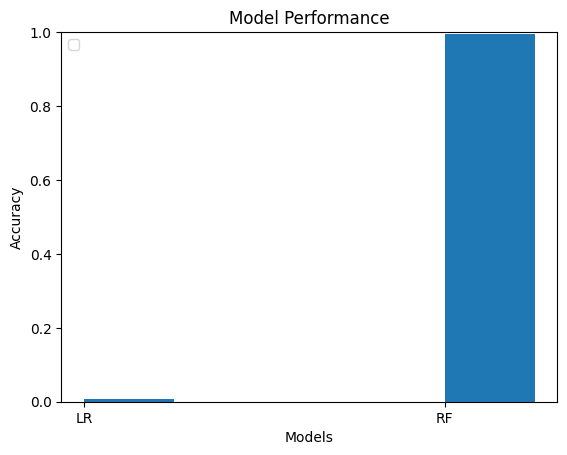

In [38]:
import matplotlib.pyplot as plt
import seaborn as sns

Acc_scores = [accuracy_LR, accuracy_RF]
labels = ['LR', 'RF']

rg= np.arange(2)
width = 0.25
plt.bar(rg+width, Acc_scores, width)
plt.xticks(rg + width/2, labels)
plt.xlabel("Models")
plt.ylabel("Accuracy")
plt.ylim([0,1])

plt.title('Model Performance')
plt.legend(loc='upper left', ncol=2)
plt.show()
labels = ['LR', 'RF']

<h1>KNN Model to predict Target Allocation</h1>

In [39]:
df_A.head()

,A_transactionType,A_id,A_allocation,A_debitOrCredit,A_amount,A_valueDate,A_currencyCode,A_transactionReferences,A_transactionAttributes
2,A,8.061604e+11,USD_2015-03-08_ACC#00001_66412 66510665106...,CR,6.507682e+09,2015-03-08,USD,510065829 HD FZ ...,66412 66510665106660296113CACK H ARAT...
4,A,9.271706e+11,USD_2015-03-20_ACC#00001_66412 66073660736...,DR,-4.720000e+03,2015-03-20,USD,YM ...,66412 6607366073666029412TOM415 ...
6,A,1.032577e+11,USD_2015-03-20_ACC#00001_66412 66073660736...,DR,-4.000000e+01,2015-03-20,USD,YM ...,66412 6607366073666029412TOM415 ...
7,A,3.126039e+11,USD_2015-03-27_ACC#00001_66412 66073660736...,CR,4.000000e+01,2015-03-27,USD,YM ...,66412 6607366073666029BLUMING SKIRP 412TO4...
8,A,1.417370e+11,USD_2021-10-20_ACC#00001_66912 02507025077...,DR,-9.231300e+04,2021-10-20,USD,RM797074 67666 UPCLOSER SAUNT TYPY H.C.,66912 0250702507797074 67666 ...


In [40]:
df_A['match'] = (df['A_allocation'].notnull())

In [41]:
df_A['A_valueDate'] = pd.to_datetime(df_A['A_valueDate']).astype(int)

data_type_val = df_A['A_valueDate'].dtypes

print(data_type_val)

int64


In [42]:
df_B['match'] = (df['targetAllocation'].notnull())


In [43]:
df_B['B_valueDate'] = pd.to_datetime(df_B['B_valueDate']).astype(int)

data_type_val = df_B['B_valueDate'].dtypes

print(data_type_val)


int64


In [44]:
from sklearn.preprocessing import StandardScaler

scaler_A = StandardScaler()
scaler_B = StandardScaler()

data_A_copy = df_A[['A_amount', 'A_id', 'A_valueDate']].copy()
data_B_copy = df_B[['B_amount', 'B_id', 'B_valueDate']].copy()

data_A_scaled = scaler_A.fit_transform(data_A_copy)
data_B_scaled = scaler_B.fit_transform(data_B_copy)

In [45]:
from sklearn.neighbors import KNeighborsClassifier

k = 1  


knn_model_a = KNeighborsClassifier(n_neighbors=k)
knn_model_a.fit(data_A_scaled, df_A['A_allocation'])


knn_model_b = KNeighborsClassifier(n_neighbors=k)
knn_model_b.fit(data_B_scaled, df_B['targetAllocation'])

KNeighborsClassifier(n_neighbors=1)

In [46]:
# Preprocess the data for Transaction B using the same scaler as Transaction B
data_B_copy = df_B[['B_amount', 'B_id', 'B_valueDate']].copy()
data_B_scaled = scaler_B.transform(data_B_copy)

# Use the KNN model for Transaction A to find neighbors in Transaction B
neighbors_indices = knn_model_a.kneighbors(data_B_scaled, n_neighbors=1, return_distance=False)

# Create a new Series for targetAllocation in Transaction B
target_allocation_series = df_A['A_allocation'].values[neighbors_indices].flatten()

In [47]:
from sklearn.metrics import accuracy_score, classification_report

# Create a new DataFrame with actual and predicted targetAllocation
evaluation_df = pd.DataFrame({
    'Actual': df_B['targetAllocation'],  # Actual targetAllocation in Transaction B
    'Predicted': target_allocation_series  # Predicted targetAllocation from Transaction A
})

# Calculate accuracy
accuracy = accuracy_score(evaluation_df['Actual'], evaluation_df['Predicted'])

print(f"Accuracy: {accuracy}")

Accuracy: 0.001222414186524106


In [48]:
"""from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np


df['A_valueDate'] = pd.to_datetime(df['A_valueDate'])
df['B_valueDate'] = pd.to_datetime(df['B_valueDate'])

amount_difference_threshold = 0.05 # 5% difference
date_difference_threshold = pd.Timedelta(days=10)  # 10-day difference

df = df[
    (np.abs(df['A_amount'] - df['B_amount']) / df['A_amount'] <= amount_difference_threshold) &
    (np.abs(df['A_valueDate'] - df['B_valueDate']).dt.days <= date_difference_threshold.days)
]

# Extract features and target
X = df[['A_id', 'A_amount', 'A_valueDate','B_id', 'B_amount', 'B_valueDate', 'A_allocation']]
y = df['targetAllocation']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)

# Initialize the KNN model
knn_model = KNeighborsClassifier(n_neighbors=3)  

# Train the model on the training data
knn_model.fit(X_train, y_train)

# Make predictions on the test data
knn_predictions = knn_model.predict(X_test)

# Calculate and print accuracy
accuracy = accuracy_score(y_test, knn_predictions)
print(f'Accuracy: {accuracy:.4f}')"""



"from sklearn.neighbors import KNeighborsClassifier\nfrom sklearn.model_selection import train_test_split\nfrom sklearn.metrics import accuracy_score\nimport numpy as np\n\n\ndf['A_valueDate'] = pd.to_datetime(df['A_valueDate'])\ndf['B_valueDate'] = pd.to_datetime(df['B_valueDate'])\n\namount_difference_threshold = 0.05 # 5% difference\ndate_difference_threshold = pd.Timedelta(days=10)  # 10-day difference\n\ndf = df[\n    (np.abs(df['A_amount'] - df['B_amount']) / df['A_amount'] <= amount_difference_threshold) &\n    (np.abs(df['A_valueDate'] - df['B_valueDate']).dt.days <= date_difference_threshold.days)\n]\n\n# Extract features and target\nX = df[['A_id', 'A_amount', 'A_valueDate','B_id', 'B_amount', 'B_valueDate', 'A_allocation']]\ny = df['targetAllocation']\n\n# Split the data into training and testing sets\nX_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)\n\n# Initialize the KNN model\nknn_model = KNeighborsClassifier(n_neighbors=3)  \n\n#